In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from tqdm import tqdm

In [2]:
data = pd.read_csv("TwoNullDataset.csv")

In [3]:
data

,Site,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,...,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
0,C34,8070.0,MALIGNANT,2b,1,0,G2,73,FEMALE,Non Curative,...,Carboplatin + Pemetrexed,Not Taking Part,NO,NO,NO,0.0,2,115.0,1,NOT CHEMO
1,C34,8140.0,MALIGNANT,1b,0.0,0,GX,69,FEMALE,Curative,...,CARBOPLATIN + VINORELBINE,Not Taking Part,NO,NO,NO,2.0,1,900.0,2,CARBOPLATIN
2,C34,8070.0,MALIGNANT,3,1.0,0,GX,61,FEMALE,Non Curative,...,CARBOPLATIN + VINORELBINE,Not Taking Part,NO,YES,NO,0.0,2,50.0,2,FLUCONAZOLE
3,C34,8041.0,MALIGNANT,1b,0,1b,G3,65,MALE,Non Curative,...,Carboplatin + Etoposide iv&po,Not Taking Part,NO,YES,NO,0.0,2,125.0,2,NOT CHEMO
4,C34,8000.0,MALIGNANT,1a,0.0,0,GX,73,FEMALE,Non Curative,...,Rituximab,Not Taking Part,NO,NO,NO,0.0,1,60.0,2,VINORELBINE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,C34,8070.0,MALIGNANT,3,2,0,G3,71,MALE,Curative,...,GemCarbo Days 1+8,Not Taking Part,NO,YES,NO,0.0,3,20.0,2,NOT CHEMO
946,C34,8140.0,MALIGNANT,3,1.0,0,G2,84,MALE,Curative,...,Cisplatin + Pemetrexed,Not Taking Part,NO,NO,NO,0.0,2,92.5,1,PEMBROLIZUMAB
947,C34,8070.0,MALIGNANT,4,2,1b,G2,70,MALE,Non Curative,...,Pemetrexed,Not Taking Part,NO,YES,NO,0.0,2,160.0,1,ETOPOSIDE
948,C34,8000.0,MALIGNANT,4,1,1b,GX,72,FEMALE,Non Curative,...,ICE TRIAL,Taking Part,NO,YES,NO,0.0,1,630.0,1,CARBOPLATIN


In [4]:
data.dtypes

Site                               object
MORPH_ICD10_O2                    float64
BEHAVIOUR_ICD10_O2                 object
T_BEST                             object
N_BEST                             object
M_BEST                             object
GRADE                              object
AGE                                 int64
SEX                                object
CANCERCAREPLANINTENT               object
CNS                                object
ACE27                               int64
NEWVITALSTATUS                     object
HEIGHT_AT_START_OF_REGIMEN        float64
WEIGHT_AT_START_OF_REGIMEN        float64
MAPPED_REGIMEN                     object
CLINICAL_TRIAL                     object
CHEMO_RADIATION                    object
REGIMEN_MOD_TIME_DELAY             object
REGIMEN_MOD_STOPPED_EARLY          object
REGIMEN_OUTCOME_SUMMARY            object
CYCLE_NUMBER                        int64
ACTUAL_DOSE_PER_ADMINISTRATION    float64
ADMINISTRATION_ROUTE              

In [5]:
data.dtypes

Site                               object
MORPH_ICD10_O2                    float64
BEHAVIOUR_ICD10_O2                 object
T_BEST                             object
N_BEST                             object
M_BEST                             object
GRADE                              object
AGE                                 int64
SEX                                object
CANCERCAREPLANINTENT               object
CNS                                object
ACE27                               int64
NEWVITALSTATUS                     object
HEIGHT_AT_START_OF_REGIMEN        float64
WEIGHT_AT_START_OF_REGIMEN        float64
MAPPED_REGIMEN                     object
CLINICAL_TRIAL                     object
CHEMO_RADIATION                    object
REGIMEN_MOD_TIME_DELAY             object
REGIMEN_MOD_STOPPED_EARLY          object
REGIMEN_OUTCOME_SUMMARY            object
CYCLE_NUMBER                        int64
ACTUAL_DOSE_PER_ADMINISTRATION    float64
ADMINISTRATION_ROUTE              

In [6]:
data= data.rename(columns={"MORPH_ICD10_O2":"Morph","BEHAVIOUR_ICD10_O2":"Behaviour","T_BEST": "T Best",
                          "N_BEST" : "N Best", "M_BEST" : "M Best", "GRADE" : "Grade", "AGE" : "Age",
                          "SEX":"Sex","CANCERCAREPLANINTENT":"Cancer Plan", "NEWVITALSTATUS" : "Vital Status",
                          "HEIGHT_AT_START_OF_REGIMEN":"Height","WEIGHT_AT_START_OF_REGIMEN":"Weight","MAPPED_REGIMEN":"Regimen","CLINICAL_TRIAL":"Clinical Trial",
                          "CHEMO_RADIATION":"Chemo Radiation","REGIMEN_MOD_TIME_DELAY":"Regimen Time Delay","REGIMEN_MOD_STOPPED_EARLY":"Regimen Stopped Early",
                          "REGIMEN_OUTCOME_SUMMARY":"Outcome","CYCLE_NUMBER":"Cycle","ACTUAL_DOSE_PER_ADMINISTRATION":"Dose Administration",
                           "ADMINISTRATION_ROUTE":"Administration Route", "DRUG_GROUP":"Drug Group","ACE27":"ACE"})


In [7]:
data

,Site,Morph,Behaviour,T Best,N Best,M Best,Grade,Age,Sex,Cancer Plan,...,Regimen,Clinical Trial,Chemo Radiation,Regimen Time Delay,Regimen Stopped Early,Outcome,Cycle,Dose Administration,Administration Route,Drug Group
0,C34,8070.0,MALIGNANT,2b,1,0,G2,73,FEMALE,Non Curative,...,Carboplatin + Pemetrexed,Not Taking Part,NO,NO,NO,0.0,2,115.0,1,NOT CHEMO
1,C34,8140.0,MALIGNANT,1b,0.0,0,GX,69,FEMALE,Curative,...,CARBOPLATIN + VINORELBINE,Not Taking Part,NO,NO,NO,2.0,1,900.0,2,CARBOPLATIN
2,C34,8070.0,MALIGNANT,3,1.0,0,GX,61,FEMALE,Non Curative,...,CARBOPLATIN + VINORELBINE,Not Taking Part,NO,YES,NO,0.0,2,50.0,2,FLUCONAZOLE
3,C34,8041.0,MALIGNANT,1b,0,1b,G3,65,MALE,Non Curative,...,Carboplatin + Etoposide iv&po,Not Taking Part,NO,YES,NO,0.0,2,125.0,2,NOT CHEMO
4,C34,8000.0,MALIGNANT,1a,0.0,0,GX,73,FEMALE,Non Curative,...,Rituximab,Not Taking Part,NO,NO,NO,0.0,1,60.0,2,VINORELBINE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,C34,8070.0,MALIGNANT,3,2,0,G3,71,MALE,Curative,...,GemCarbo Days 1+8,Not Taking Part,NO,YES,NO,0.0,3,20.0,2,NOT CHEMO
946,C34,8140.0,MALIGNANT,3,1.0,0,G2,84,MALE,Curative,...,Cisplatin + Pemetrexed,Not Taking Part,NO,NO,NO,0.0,2,92.5,1,PEMBROLIZUMAB
947,C34,8070.0,MALIGNANT,4,2,1b,G2,70,MALE,Non Curative,...,Pemetrexed,Not Taking Part,NO,YES,NO,0.0,2,160.0,1,ETOPOSIDE
948,C34,8000.0,MALIGNANT,4,1,1b,GX,72,FEMALE,Non Curative,...,ICE TRIAL,Taking Part,NO,YES,NO,0.0,1,630.0,1,CARBOPLATIN


In [8]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

from sklearn.preprocessing import OneHotEncoder

In [9]:
data['Vital Status'].value_counts()

D    549
A    401
Name: Vital Status, dtype: int64

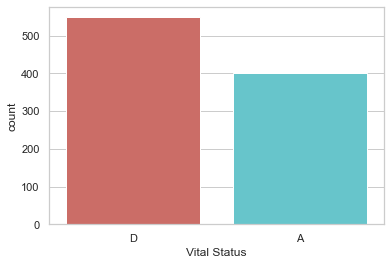

<Figure size 432x288 with 0 Axes>

In [10]:
sns.countplot(x='Vital Status',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')


In [11]:
aliveCount = len(data[data['Vital Status'] == "A"])
deadCount = len(data[data['Vital Status'] == "D"])
percentAlive = aliveCount/(aliveCount+deadCount)
percentDead = deadCount/(aliveCount+deadCount)

print("Percentage of Alive: ", percentAlive*100,"%")
print("Percentage of Dead:  " , percentDead*100,"%")


Percentage of Alive:  42.21052631578948 %
Percentage of Dead:   57.78947368421052 %


In [12]:
data['Vital Status'] = data['Vital Status'].replace("A",1);
data['Vital Status'] = data['Vital Status'].replace("D",0);
data['Vital Status']

0      0
1      0
2      0
3      0
4      0
      ..
945    0
946    1
947    0
948    1
949    1
Name: Vital Status, Length: 950, dtype: int64

In [13]:
data = data.rename(columns={"Vital Status":"Alive"})

In [14]:
data["Height"]

0      1.80
1      1.74
2      1.74
3      1.64
4      1.62
       ... 
945    1.50
946    1.69
947    1.75
948    1.62
949    1.60
Name: Height, Length: 950, dtype: float64

In [15]:
cat_vars = data.columns.tolist()
cat_vars.remove("Site")
cat_vars.remove("Alive")
cat_vars.remove("Height")
cat_vars.remove("Weight")
cat_vars.remove("Morph")
cat_vars.remove("Age")
cat_vars.remove("Cycle")
cat_vars.remove("Dose Administration")
cat_vars

['Behaviour',
 'T Best',
 'N Best',
 'M Best',
 'Grade',
 'Sex',
 'Cancer Plan',
 'CNS',
 'ACE',
 'Regimen',
 'Clinical Trial',
 'Chemo Radiation',
 'Regimen Time Delay',
 'Regimen Stopped Early',
 'Outcome',
 'Administration Route',
 'Drug Group']

In [16]:
num_vars = ["Site","Alive","Height","Weight","Morph","Age","Cycle","Dose Administration"]

In [17]:
data_final = data.copy()
dete = pd.get_dummies(data_final)
dete

,Morph,Age,ACE,Alive,Height,Weight,Cycle,Dose Administration,Administration Route,Site_C34,...,Drug Group_STEROID,Drug Group_TEMOZOLOMIDE,Drug Group_THALIDOMIDE,Drug Group_TRABECTEDIN,Drug Group_TRASTUZUMAB,Drug Group_TREMELIMUMAB,Drug Group_TRIAL,Drug Group_VINBLASTINE,Drug Group_VINCRISTINE,Drug Group_VINORELBINE
0,8070.0,73,1,0,1.80,68.80,2,115.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,8140.0,69,9,0,1.74,55.00,1,900.0,2,1,...,0,0,0,0,0,0,0,0,0,0
2,8070.0,61,0,0,1.74,56.85,2,50.0,2,1,...,0,0,0,0,0,0,0,0,0,0
3,8041.0,65,1,0,1.64,52.90,2,125.0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,8000.0,73,9,0,1.62,52.30,1,60.0,2,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,8070.0,71,9,0,1.50,67.90,3,20.0,2,1,...,0,0,0,0,0,0,0,0,0,0
946,8140.0,84,9,1,1.69,41.30,2,92.5,1,1,...,0,0,0,0,0,0,0,0,0,0
947,8070.0,70,9,0,1.75,74.80,2,160.0,1,1,...,0,0,0,0,0,0,0,0,0,0
948,8000.0,72,9,1,1.62,89.00,1,630.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#X = X.drop(columns=["Site","Alive"], axis = 1)
for var in cat_vars:
    data_final = pd.concat((data_final,pd.get_dummies(data[var], prefix = var)),1)


Ytrain = data_final[["Alive"]]
Xtrain = data_final.drop(columns=["Site","Alive"])
for var in cat_vars:
    Xtrain = Xtrain.drop(columns=[var])


C:\Users\User\AppData\Local\Temp/ipykernel_7848/547321042.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_final = pd.concat((data_final,pd.get_dummies(data[var], prefix = var)),1)


In [19]:
Ytrain

,Alive
0,0
1,0
2,0
3,0
4,0
...,...
945,0
946,1
947,0
948,1


In [20]:
Xtrain

,Morph,Age,Height,Weight,Cycle,Dose Administration,Behaviour_MALIGNANT,T Best_1,T Best_1a,T Best_1b,...,Drug Group_STEROID,Drug Group_TEMOZOLOMIDE,Drug Group_THALIDOMIDE,Drug Group_TRABECTEDIN,Drug Group_TRASTUZUMAB,Drug Group_TREMELIMUMAB,Drug Group_TRIAL,Drug Group_VINBLASTINE,Drug Group_VINCRISTINE,Drug Group_VINORELBINE
0,8070.0,73,1.80,68.80,2,115.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8140.0,69,1.74,55.00,1,900.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8070.0,61,1.74,56.85,2,50.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8041.0,65,1.64,52.90,2,125.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8000.0,73,1.62,52.30,1,60.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,8070.0,71,1.50,67.90,3,20.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
946,8140.0,84,1.69,41.30,2,92.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
947,8070.0,70,1.75,74.80,2,160.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
948,8000.0,72,1.62,89.00,1,630.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.3, random_state = 30)

# Logistic Regression

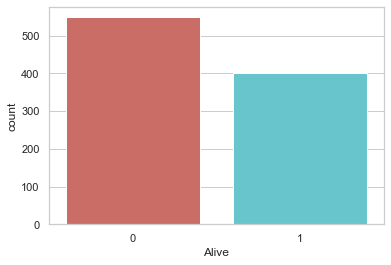

<Figure size 432x288 with 0 Axes>

In [22]:
#sampled_data = data_final.sample(n=50000)
sns.countplot(x='Alive',data=data_final, palette='hls')
plt.show()
plt.savefig('count_plot')


In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 400))
pipe.fit(X_train,Y_train.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=400))])

In [24]:
pipe.score(X_test,Y_test)


0.6631578947368421

In [25]:
y_pred = pipe.predict(X_test)



In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [27]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       170
           1       0.59      0.54      0.56       115

    accuracy                           0.66       285
   macro avg       0.65      0.64      0.64       285
weighted avg       0.66      0.66      0.66       285



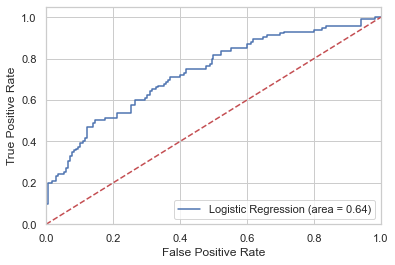

In [28]:

logit_roc_auc = roc_auc_score(Y_test, pipe.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, pipe.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# XGBoost


In [29]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [30]:
data_dmatrix = xgb.DMatrix(data=Xtrain, label=Ytrain)

In [31]:
xg_reg = xgb.XGBClassifier(objective = 'binary:logistic')

xg_reg.fit(X_train, Y_train)

y_pred = xg_reg.predict(X_test)

In [32]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       170
           1       0.66      0.61      0.63       115

    accuracy                           0.72       285
   macro avg       0.70      0.70      0.70       285
weighted avg       0.71      0.72      0.71       285



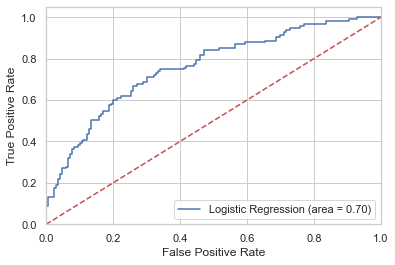

In [33]:
logit_roc_auc = roc_auc_score(Y_test, xg_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, xg_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Explainable Boosting Machine (EBM)


In [34]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

In [35]:
ebm = ExplainableBoostingClassifier(n_jobs = 8)
ebm.fit(X_train, Y_train)

#ebm_global = ebm.explain_global()
#show(emb_global)

#ebm_local = ebm.explain_local(X_test[:5], Y_test[:5])
#show(ebm_local)

ExplainableBoostingClassifier(n_jobs=8)

In [36]:
y_preds = ebm.predict(X_test)
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       170
           1       0.67      0.56      0.61       115

    accuracy                           0.71       285
   macro avg       0.70      0.69      0.69       285
weighted avg       0.71      0.71      0.71       285



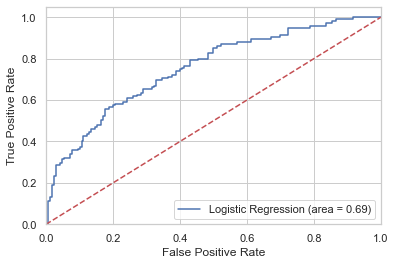

In [37]:
logit_roc_auc = roc_auc_score(Y_test, ebm.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, ebm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train.values.ravel())
y_pred=clf.predict(X_test)

In [40]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.78       170
           1       0.70      0.53      0.60       115

    accuracy                           0.72       285
   macro avg       0.71      0.69      0.69       285
weighted avg       0.72      0.72      0.71       285



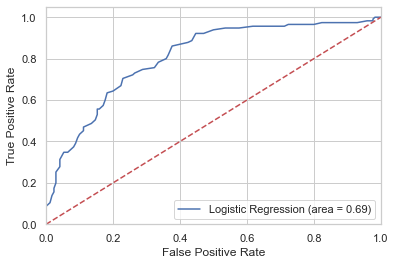

In [41]:
logit_roc_auc = roc_auc_score(Y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()